[[ 3.86695475]
 [ 2.57681769]
 [ 4.41615702]
 [-5.38082099]
 [-5.72124985]
 [-6.91131038]
 [ 1.48188689]
 [-1.4858384 ]
 [ 0.27056399]
 [-1.20246133]
 [-4.83198635]
 [ 1.71509698]
 [-3.01183523]
 [-2.35820002]
 [-4.16299961]
 [-1.13503554]
 [-0.56053219]
 [ 1.97715373]
 [-2.35359495]
 [-2.34677097]
 [ 0.92824835]
 [-4.49209552]
 [ 1.07598636]
 [-1.14614439]
 [ 1.11814865]
 [-2.27050582]
 [-2.25761119]
 [-0.51937656]] 0.32589033258572764 3000


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'linewidth'


[[ 1.27273951]
 [ 0.6252718 ]
 [ 1.18108869]
 [-2.01996086]
 [-0.91742375]
 [-1.43166444]
 [ 0.12400635]
 [-0.36553437]
 [-0.35723962]
 [-0.17513048]
 [-1.45815646]
 [-0.05098906]
 [-0.61555504]
 [-0.27470631]
 [-1.19281652]
 [-0.24218823]
 [-0.20600609]
 [-0.04473075]
 [-0.2777845 ]
 [-0.2953781 ]
 [-0.45635749]
 [-1.04320249]
 [ 0.02777171]
 [-0.29243131]
 [ 0.01556681]
 [-0.32737959]
 [-0.14388693]
 [-0.92465257]] 0.5290027297126465 3000


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'linewidth'


[[ 0.02187771]
 [-0.01748172]
 [ 0.00571079]
 [-0.05516895]
 [-0.01314877]
 [-0.03859858]
 [-0.01846356]
 [-0.00773219]
 [-0.00892429]
 [-0.02280452]
 [-0.04343846]
 [-0.00235623]
 [-0.01415612]
 [-0.00349508]
 [-0.04143588]
 [-0.02100593]
 [-0.00471917]
 [-0.00359131]
 [-0.00632226]
 [-0.00502441]
 [-0.03197676]
 [-0.03416335]
 [-0.00107629]
 [-0.00702615]
 [-0.00038506]
 [-0.0079823 ]
 [-0.00154779]
 [-0.04108677]] 0.6864838338726168 3000


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'linewidth'


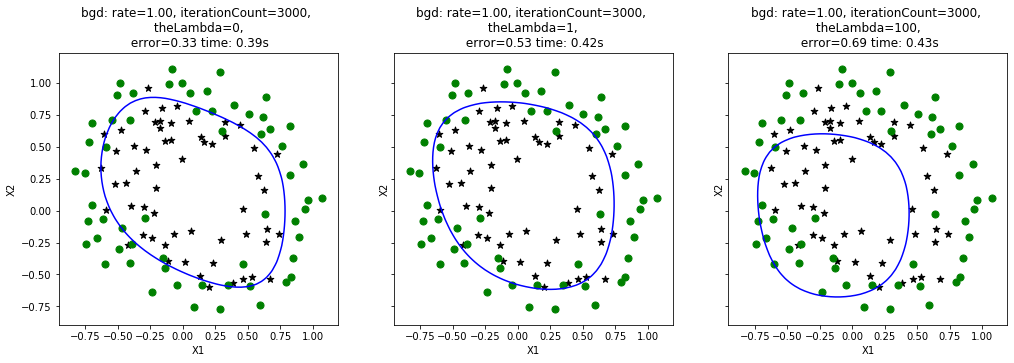

In [6]:
import numpy as np
import logical_regression as regression
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import PolynomialFeatures
X, y = regression.loadDataSet('data/non_linear.txt')
poly = PolynomialFeatures(6)
XX = poly.fit_transform(X[:,1:3])
m, n = XX.shape
options = [{
    'rate': 1,
    'epsilon': 0.01,
    'theLambda': theLambda,
    'maxLoop': 3000,
    'method': 'bgd'
} for theLambda in [0, 1.0, 100.0]]
figures, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))
for idx, option in enumerate(options):
    result, timeConsumed = regression.gradient(XX, y, option)
    thetas, errors, iterationCount = result
    theta = thetas[-1]
    print(theta, errors[-1], iterationCount)
    ax = axes[idx]
    # 绘制数据点
    title = '%s: rate=%.2f, iterationCount=%d, \n theLambda=%d, \n error=%.2f time: %.2fs' % (
            option['method'], option['rate'], iterationCount, option['theLambda'], errors[-1], timeConsumed)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    for i in range(m):
        x = X[i].A[0]
        if y[i] == 1:
            ax.scatter(x[1], x[2], marker='*', color='black', s=50)
        else:
            ax.scatter(x[1], x[2], marker='o', color='green', s=50)
    # 绘制决策边界
    x1Min = X[:, 1].min()
    x1Max = X[:, 1].max()
    x2Min = X[:, 2].min()
    x2Max = X[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1Min, x1Max),
        np.linspace(x2Min, x2Max))
    h = regression.sigmod(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    ax.contour(xx1, xx2, h, [0.5], colors='b', linewidth=.5)
plt.show()